# Seminar 2 (Optimization)

## Two-dimensional classification

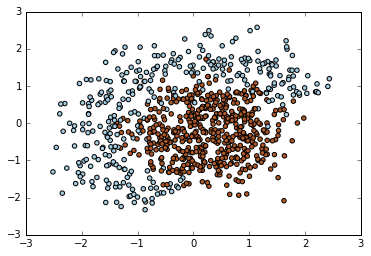

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
from sklearn import datasets, preprocessing

(X, y) = datasets.make_circles(n_samples=1024, shuffle=True, noise=0.2, factor=0.4)
ind = np.logical_or(y==1, X[:,1] > X[:,0] - 0.5)
X = X[ind,:]
m = np.array([[1, 1], [-2, 1]])
X = preprocessing.scale(X)
y = y[ind]
y = 2*y - 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

In [2]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def visualize(X, y, w, loss, n_iter):
    plt.clf()
    Z = classify(np.c_[xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())

**Your task starts here**

Implement classification with hinge loss.
You should use up to the second order terms of X for your classifier, as provided by function **expand**.

In [9]:
def expand(X):
    X_ = np.zeros((X.shape[0], 6))
    X_[:,0:2] = X
    X_[:,2:4] = X**2
    X_[:,4] = X[:,0] * X[:,1]
    X_[:,5] = 1
    
    return X_

def classify(X, w):
    X_expanded = expand(X).dot(w)
    sign = np.sign(X_expanded)
    
    return sign

def compute_loss(X, y, w):
    X_expanded = expand(X).dot(w)
    loss = 1 - y * X_expanded
    loss_accumm= loss[loss > 0].sum()

    return loss_accumm

def compute_grad(X, y, w):
    X_expanded = expand(X).dot(w)
    f = y * X_expanded
    gradient = np.tile(y, (expand(X).shape[1], 1)).T * expand(X)
    gradient_accumm = -gradient[f < 1].sum(axis=0)
                
    return gradient_accumm

Find an optimal learning rate for gradient descent for given batch size. 
You can see the example of correct output below this cell before you run it.

**Don't change the batch size!**

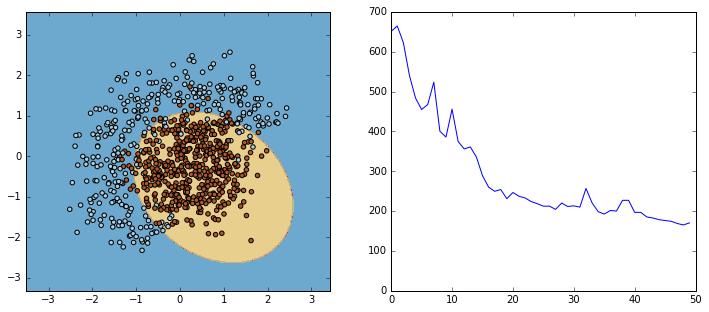

In [11]:
w = np.array([1,0,0,0,0,0])

#alpha = 0.0 # learning rate
#Lets try 0.05
alpha = 0.05

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    w = w - alpha * compute_grad(X[ind,:], y[ind], w)

visualize(X, y, w, loss, n_iter)
plt.clf()

In [12]:
#To try other learning rates, lets wrap the cell above in a function
def batch_gradient_descent(alpha):
    w = np.array([1,0,0,0,0,0])
    alpha = alpha
    n_iter = 50
    batch_size = 4
    loss = np.zeros(n_iter)
    plt.figure(figsize=(12,5))
    for i in range(n_iter):
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] = compute_loss(X, y, w)
        visualize(X[ind,:], y[ind], w, loss, n_iter)
        w = w - alpha * compute_grad(X[ind,:], y[ind], w)
    
    visualize(X, y, w, loss, n_iter)
    return plt.clf()

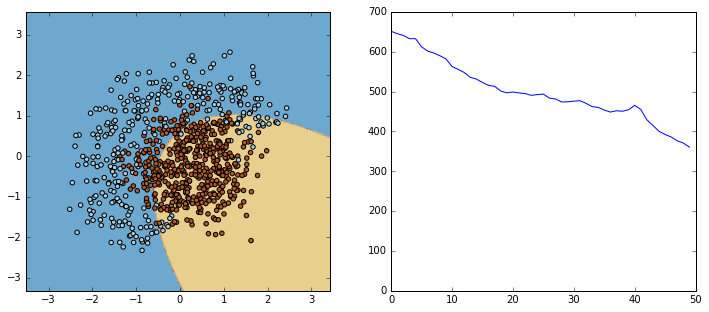

In [13]:
#We can use a smaller learning rate
batch_gradient_descent(0.01)

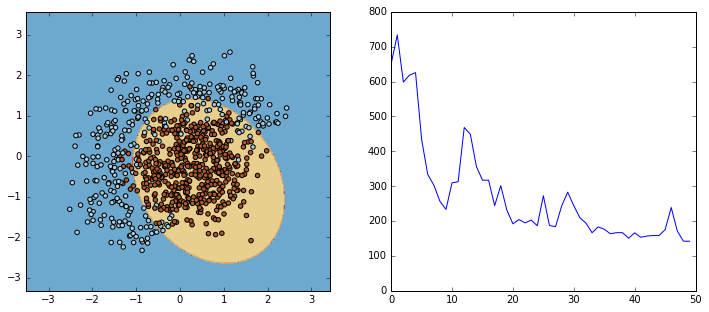

In [14]:
#Or a larger learning rate
batch_gradient_descent(0.1)

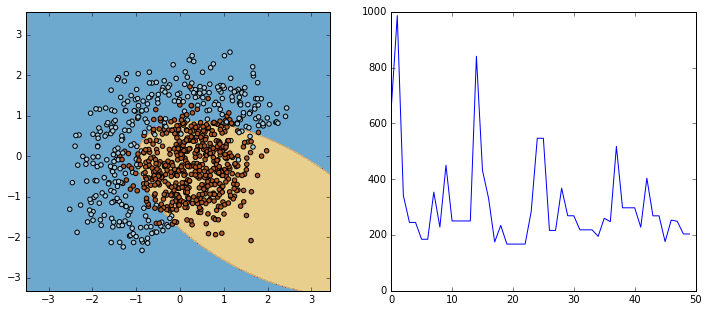

In [15]:
#Or a much larger learning rate
batch_gradient_descent(0.5)

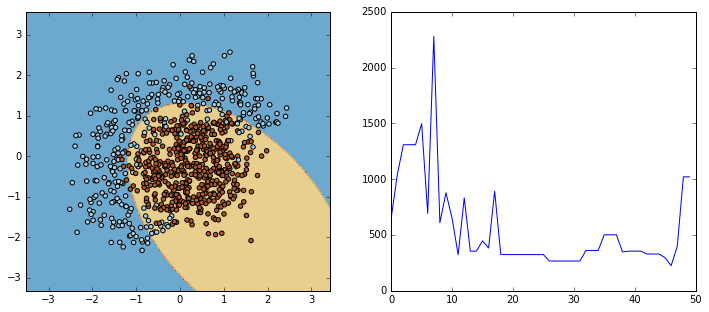

In [16]:
#Or an even larger learning rate
batch_gradient_descent(0.9)

Implement gradient descent with momentum and test it's performance for different learning rate and momentum values.

In [21]:
#Lets wrap before the code below in a function, so we can try different rates for momentum and learning
def batch_gradient_descent_momentum(alpha, mu):
    w = np.array([1,0,0,0,0,0])
    v = w.copy()
    #alpha = 0.0 # learning rate
    #mu    = 0.0 # momentum
    alpha = alpha
    mu = mu
    
    n_iter = 50
    batch_size = 4
    loss = np.zeros(n_iter)
    plt.figure(figsize=(12,5))
    
    for i in range(n_iter):
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] = compute_loss(X, y, w)
        visualize(X[ind,:], y[ind], w, loss, n_iter)
        
        #update w here
        v = mu * v - alpha * compute_grad(X[ind,:], y[ind], w)
        w = w+v
    visualize(X, y, w, loss, n_iter)
    
    return plt.clf()

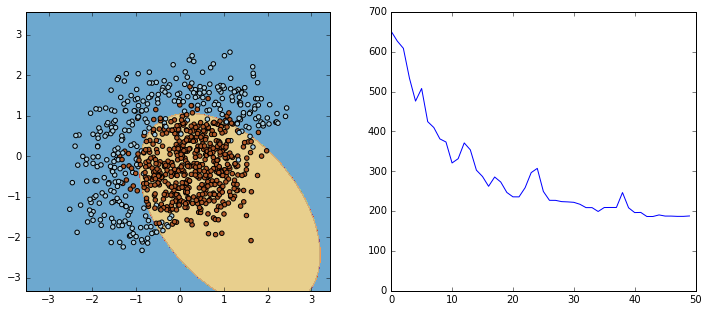

In [22]:
#We had good results with alpha=0.05, lets use it together with a very small mu
batch_gradient_descent_momentum(0.05, 0.01)

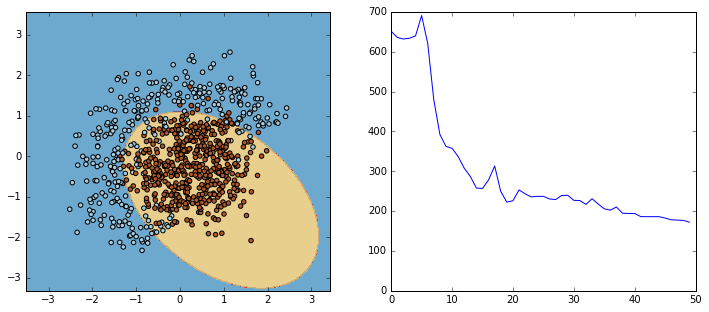

In [23]:
#Lets keep alpha=0.05 and increase mu to 0.05
batch_gradient_descent_momentum(0.05, 0.05)

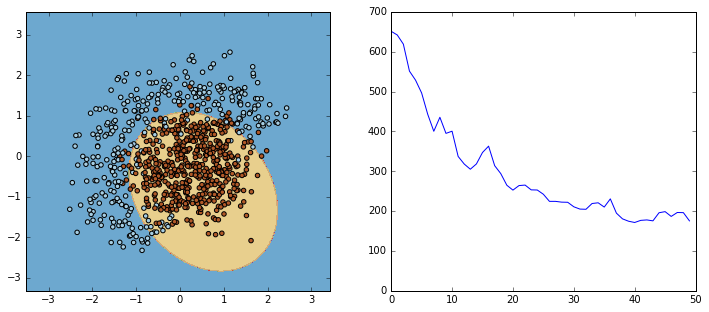

In [24]:
#We can increase mu even more to 0.1
batch_gradient_descent_momentum(0.05, 0.1)

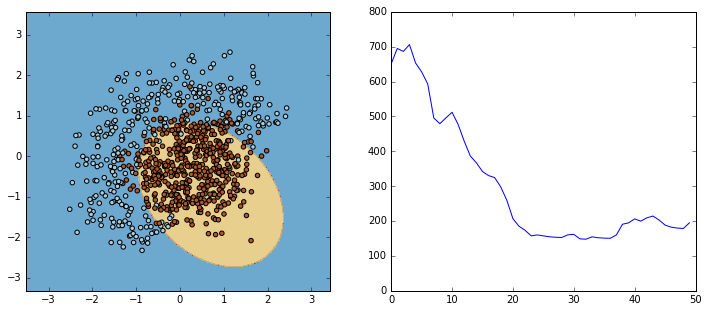

In [25]:
#What happens if now we try 0.5 for mu?
batch_gradient_descent_momentum(0.05, 0.5)

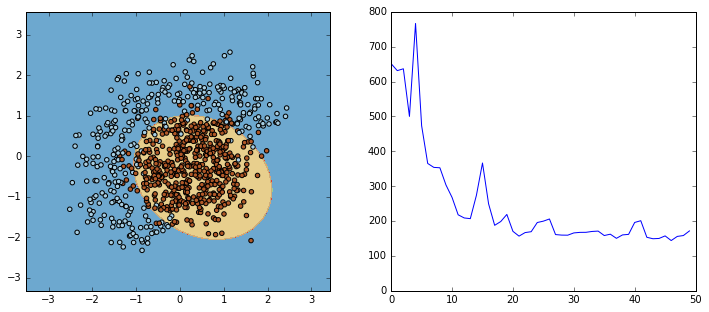

In [26]:
#What happens if we update alpha with 0.1 and mu with 0.1 for mu?
batch_gradient_descent_momentum(0.1, 0.1)

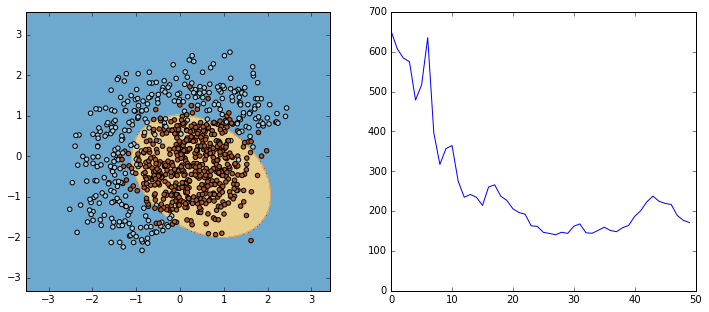

In [27]:
#What happens if we keep alpha with 0.1 but reduce mu to 0.5 for mu?
batch_gradient_descent_momentum(0.1, 0.5)

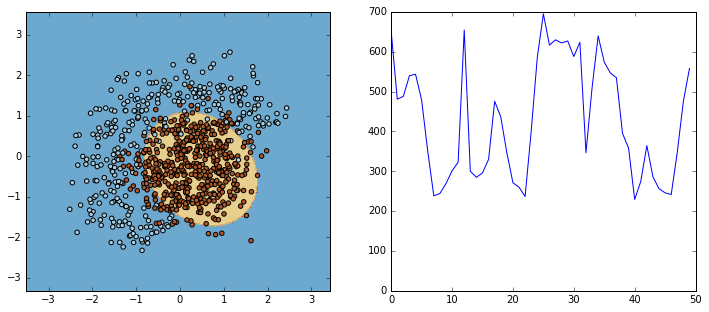

In [37]:
#Lets try with alpha=0.5 and mu=0.5
batch_gradient_descent_momentum(0.5, 0.5)

Finally, try Nesterov's accelerated gradient

In [30]:
#Let pack the code below into a function to do our tests
def batch_gradient_descent_nesterov(alpha, mu):
    w = np.array([1,0,0,0,0,0])
    v = w.copy()
    
    #alpha = 0.0 # learning rate
    #mu    = 0.0 # momentum
    n_iter = 50
    batch_size = 4
    loss = np.zeros(n_iter)
    plt.figure(figsize=(12,5))
    
    for i in range(n_iter):
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] = compute_loss(X, y, w)
        visualize(X[ind,:], y[ind], w, loss, n_iter)
        
        #update w here
        v = mu * v - alpha * compute_grad(X[ind,:], y[ind], w + mu * v)
        w = w + v
        
    visualize(X, y, w, loss, n_iter)
    return plt.clf()

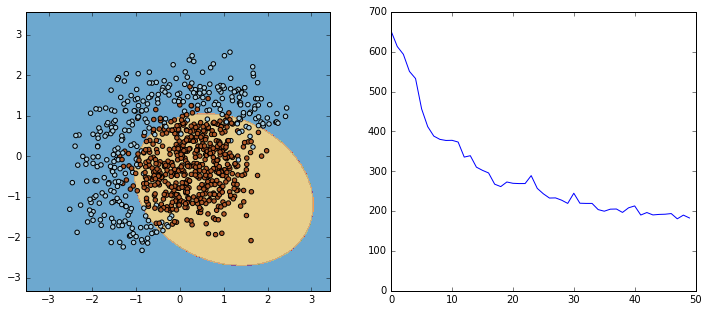

In [31]:
#Lets try with alpha=0.05 and mu=0.05
batch_gradient_descent_nesterov(0.05, 0.05)

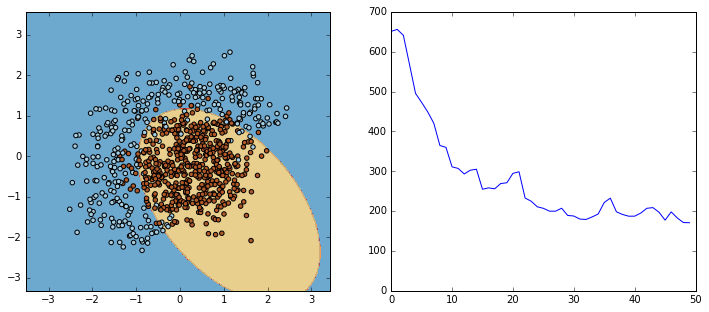

In [33]:
#Lets try with alpha=0.05 and mu=0.1
batch_gradient_descent_nesterov(0.05, 0.1)

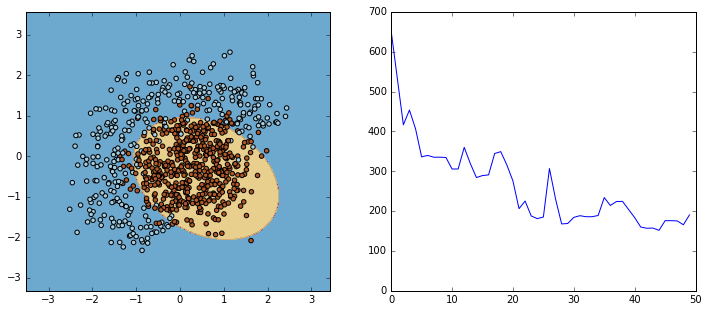

In [34]:
#Lets try with alpha=0.1 and mu=0.05
batch_gradient_descent_nesterov(0.1, 0.05)

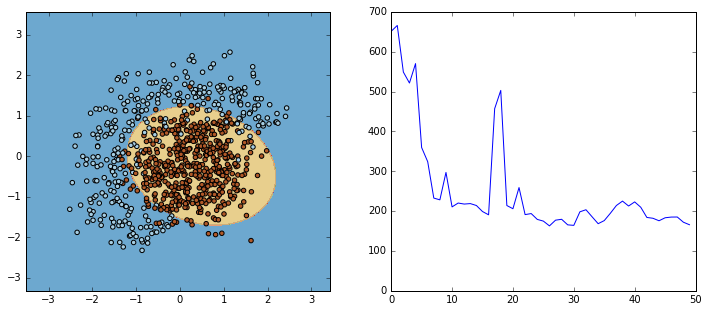

In [35]:
#Lets try with alpha=0.1 and mu=0.1
batch_gradient_descent_nesterov(0.1, 0.1)

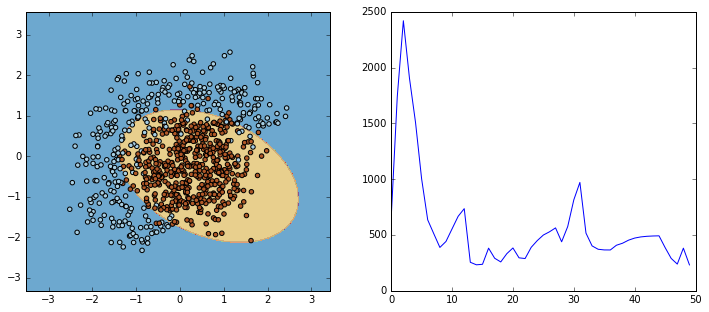

In [36]:
#Lets try with alpha=0.5 and mu=0.5
batch_gradient_descent_nesterov(0.5, 0.5)

Which optimization method do you consider the best? Type your answer in the cell below

After evaluating multiple learning rates and momentum, it can be noticed that Nesterov behaves more consistent/smoother, specially as we increase the values. I would argue that this one is the best of the 3. We can have more confidence that our different choices of parameters will behave more or less the same.